In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import squarify

import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/machine-learning-engineer-salary-in-2024/salaries.csv


# Ingesting the .csv data

In [2]:
Data_Salary =  pd.read_csv('/kaggle/input/machine-learning-engineer-salary-in-2024/salaries.csv')

# Getting a glimpse at the dataset

This printed the first 5 rows of data to get a sneak peek into what we'll be working with.

**Description of the features in dataset:**

* work_year: The year in which the salary data was collected (e.g., 2024).
* experience_level: The level of experience of the employee (e.g., MI for Mid-Level).
* employment_type: The type of employment (e.g., FT for Full-Time).
* job_title: The title of the job (e.g., Data Scientist).
* salary: The salary amount.
* salary_currency: The currency in which the salary is denominated (e.g., USD for US Dollars).
* salary_in_usd: The salary amount converted to US Dollars.
* employee_residence: The country of residence of the employee (e.g., AU for Australia).
* remote_ratio: The ratio indicating the level of remote work (0 for no remote work).
* company_location: The location of the company (e.g., AU for Australia).
* company_size: The size of the company (e.g., S for Small).

In [3]:
print(Data_Salary.head())

   work_year experience_level employment_type             job_title  salary  \
0       2024               MI              FT        Data Scientist  120000   
1       2024               MI              FT        Data Scientist   70000   
2       2024               MI              CT        Data Scientist  130000   
3       2024               MI              CT        Data Scientist  110000   
4       2024               MI              FT  Data Science Manager  240000   

  salary_currency  salary_in_usd employee_residence  remote_ratio  \
0             USD         120000                 AU             0   
1             USD          70000                 AU             0   
2             USD         130000                 US             0   
3             USD         110000                 US             0   
4             USD         240000                 US             0   

  company_location company_size  
0               AU            S  
1               AU            S  
2       

# Getting information on the dataset

Below I've gathered data set information.  I can see that we have ~16.5K rows, and a total of 11 columns.  Most of our data is either in object or integer data type.

In [4]:
print(Data_Salary.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16494 entries, 0 to 16493
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           16494 non-null  int64 
 1   experience_level    16494 non-null  object
 2   employment_type     16494 non-null  object
 3   job_title           16494 non-null  object
 4   salary              16494 non-null  int64 
 5   salary_currency     16494 non-null  object
 6   salary_in_usd       16494 non-null  int64 
 7   employee_residence  16494 non-null  object
 8   remote_ratio        16494 non-null  int64 
 9   company_location    16494 non-null  object
 10  company_size        16494 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.4+ MB
None


# Running some simple summary statistics for overall salary average in 2024

**Here are a few things I'd like to know:**
* firstly I want to know the amount of people with each job title in this dataset
* I'll also be looking to perform some summary statistics on this data
* I want to get unique values for company size, company_location, and work_year

In [5]:
job_title_counts = Data_Salary['job_title'].value_counts()
print(job_title_counts)

job_title
Data Engineer                    3456
Data Scientist                   3312
Data Analyst                     2428
Machine Learning Engineer        1703
Research Scientist                529
                                 ... 
Quantitative Research Analyst       1
AWS Data Architect                  1
Analytics Engineering Manager       1
Marketing Data Scientist            1
Data Analytics Associate            1
Name: count, Length: 155, dtype: int64


In [6]:
summary_stats = Data_Salary.describe()
print(summary_stats)

          work_year        salary  salary_in_usd  remote_ratio
count  16494.000000  1.649400e+04   16494.000000  16494.000000
mean    2023.224991  1.637878e+05  149713.575725     32.044986
std        0.713405  3.406017e+05   68516.136918     46.260201
min     2020.000000  1.400000e+04   15000.000000      0.000000
25%     2023.000000  1.020000e+05  101517.500000      0.000000
50%     2023.000000  1.422000e+05  141300.000000      0.000000
75%     2024.000000  1.873422e+05  185900.000000    100.000000
max     2024.000000  3.040000e+07  800000.000000    100.000000


**Median Salary in USD**

In [7]:
print(np.median(Data_Salary['salary_in_usd']))

141300.0


In [8]:
Sizes = Data_Salary['company_size'].unique() 
Locations = Data_Salary['company_location'].unique()
Year = Data_Salary['work_year'].unique()
print(Sizes)
print(Locations)
print(Year)

['S' 'M' 'L']
['AU' 'US' 'GB' 'CA' 'NL' 'LT' 'DK' 'FR' 'ZA' 'NZ' 'AR' 'ES' 'KE' 'LV'
 'IN' 'DE' 'IL' 'FI' 'AT' 'BR' 'CH' 'AE' 'PL' 'SA' 'UA' 'EG' 'PH' 'TR'
 'OM' 'MX' 'PT' 'BA' 'IT' 'AS' 'IE' 'EE' 'MT' 'HU' 'LB' 'RO' 'VN' 'NG'
 'LU' 'GI' 'CO' 'SI' 'GR' 'MU' 'RU' 'KR' 'CZ' 'QA' 'GH' 'SE' 'AD' 'EC'
 'NO' 'JP' 'HK' 'CF' 'SG' 'TH' 'HR' 'AM' 'PK' 'IR' 'BS' 'PR' 'BE' 'ID'
 'MY' 'HN' 'DZ' 'IQ' 'CN' 'CL' 'MD']
[2024 2022 2023 2020 2021]


# Salary Distribution Histogram

To analyze the distribution of salaries in USD, we created a histogram with a kernel density estimate (KDE) plot. The histogram reveals the following insights:

-The salary distribution appears to be right-skewed, with a long tail towards higher salaries.

-The majority of salaries fall within the range of $101,000 - 186,000.

-The median salary is approximately $141,300 , indicating that half of the salaries are above/below this value.

-There are a few outliers with significantly high salaries, which may require further investigation.

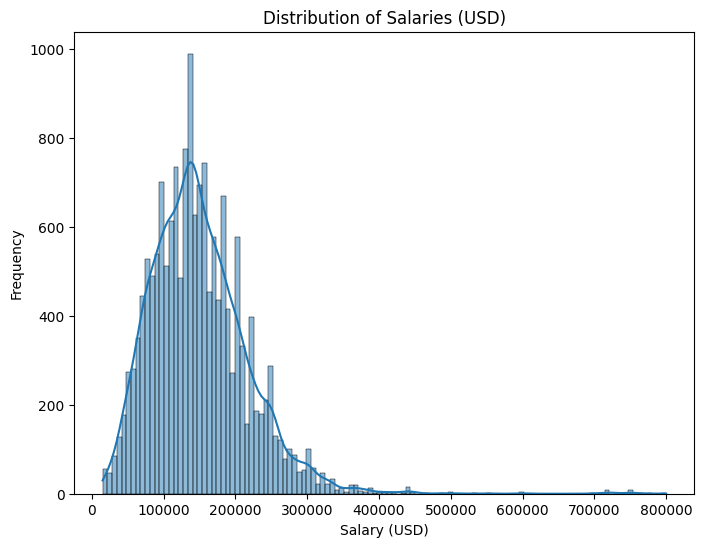

In [9]:
plt.figure(figsize=(8, 6))
sns.histplot(data=Data_Salary, x='salary_in_usd', kde=True)
plt.title('Distribution of Salaries (USD)')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')
plt.show()

# Top 20 Job Title Bar Plot

To visualize the distribution of the top 20 job titles in our dataset, I created a barplot using matplotlib. 

The barplot allows us to easily compare the frequencies of different job titles and identify the most common roles.

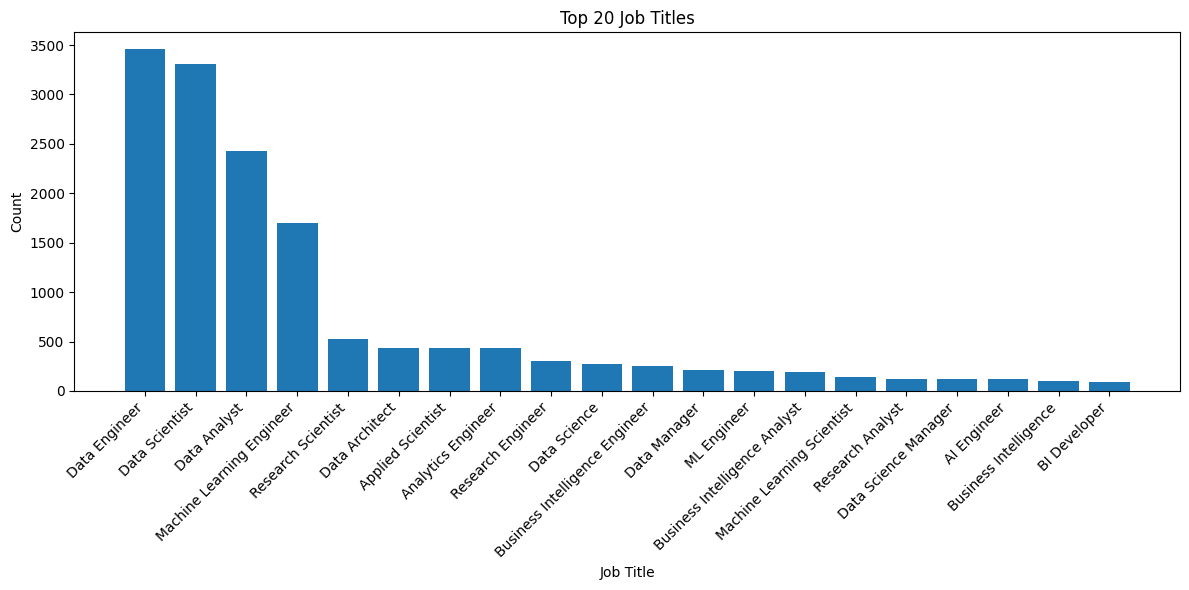

In [10]:
top_20_titles = Data_Salary['job_title'].value_counts().head(20)

# Create a bar plot for the top 20 job titles
plt.figure(figsize=(12, 6))
plt.bar(top_20_titles.index, top_20_titles.values)
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.title('Top 20 Job Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**The barplot reveals the following insights:**

The most frequent job title among the top 20 is Data Engineer, indicating a high demand for this role.

Other prominent job titles include Data Scientist, Data Analyst, and Machine Learning Engineer, suggesting their significance in the dataset.

The frequencies of the top 20 job titles vary, with some titles having notably higher counts than others.

# Job Title Word Cloud

To create a visually appealing representation of the top 20 job titles, I generated a word cloud. 

The word cloud showcases the most common job titles, with the size of each word proportional to its frequency

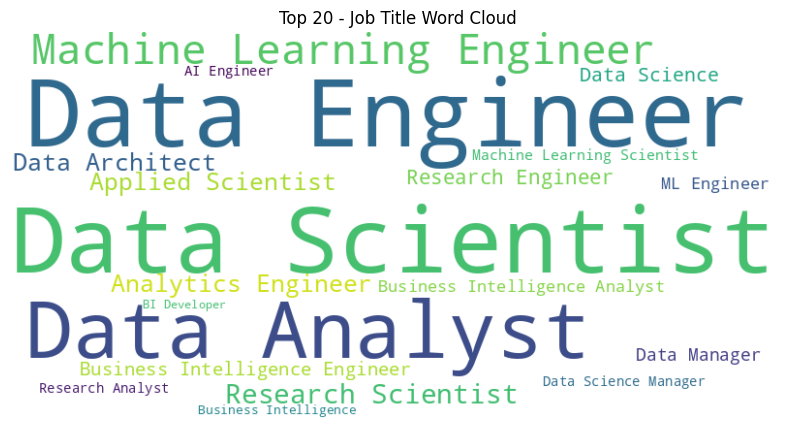

In [11]:
top_20_titles = Data_Salary['job_title'].value_counts().head(20)

# Create a dictionary of job titles and their counts
title_counts = dict(top_20_titles)

#Word Cloud Object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(title_counts)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 20 - Job Title Word Cloud')
plt.show()

# Top 10 Job Title Tree Map

To further explore the hierarchical structure and proportions of job titles, I created a treemap visualization focusing on the top 10 job titles. 

The treemap uses nested rectangles to represent the relative frequencies of each job title.

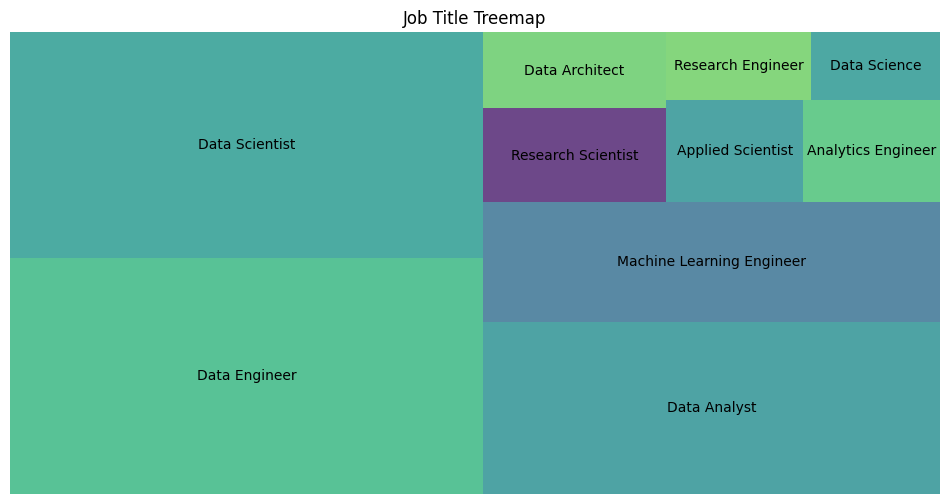

In [12]:
job_title_counts = Data_Salary['job_title'].value_counts().head(10)

# Create a treemap plot
plt.figure(figsize=(12, 6))
squarify.plot(sizes=job_title_counts, label=job_title_counts.index, alpha=0.8)
plt.axis('off')
plt.title('Job Title Treemap')
plt.show()

# Company Size Analysis

* In this section I've explored the distribution of company sizes in the dataset.
* I've analyzed the relationship between company size and salary using box plots and scatter plots.
* With this I was able to identify patterns in the salaries based on company size.

Value Counts by Company Size:
company_size
M    15268
L     1038
S      188
Name: count, dtype: int64
Mean Salaries by Company Size:
company_size
L    140815.940270
M    151095.289167
S     86627.111702

Median Salaries by Company Size:
company_size
L    136000.0
M    143000.0
S     71089.5


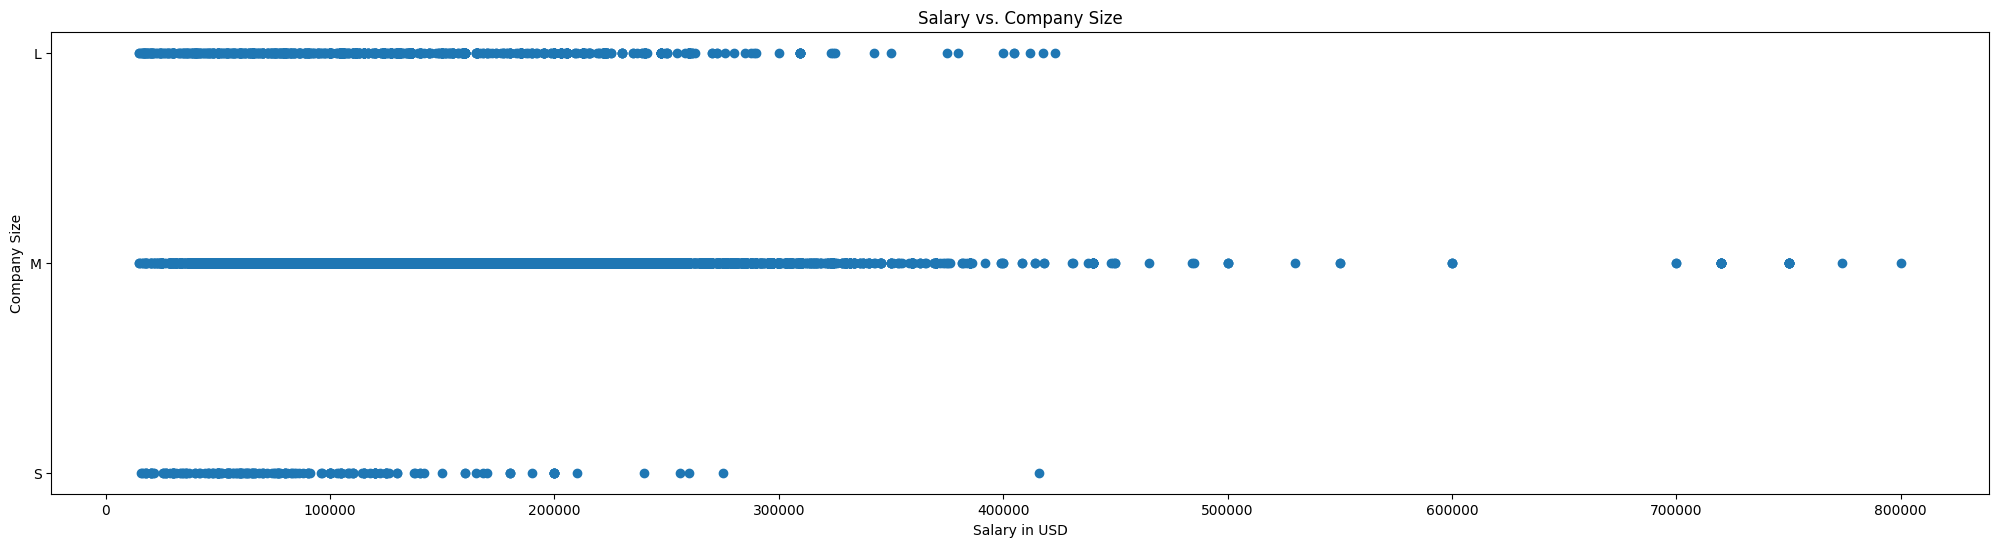

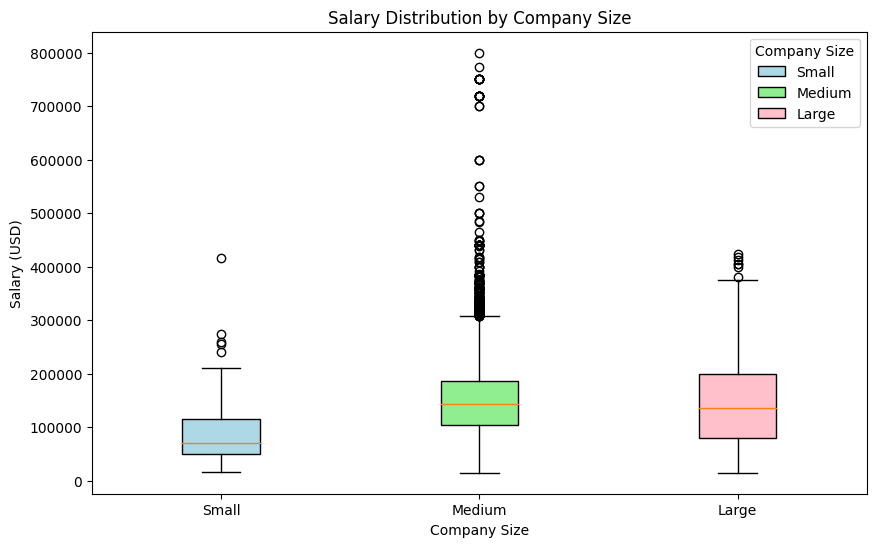

In [13]:
#Variables 
size=Data_Salary['company_size']
salary=Data_Salary['salary_in_usd']

#Company Size Counts
print("Value Counts by Company Size:")
company_size_counts = Data_Salary['company_size'].value_counts()
print(company_size_counts)

# Calculated Group Means & Median
print("Mean Salaries by Company Size:")
print(Data_Salary.groupby('company_size')['salary_in_usd'].mean().to_string(index=True))
print("\nMedian Salaries by Company Size:")
print(Data_Salary.groupby('company_size')['salary_in_usd'].median().to_string(index=True))

#Scatter Plot
plt.figure(figsize=(25, 6))
plt.scatter(salary,size)
plt.xlabel('Salary in USD')
plt.ylabel('Company Size')
plt.title('Salary vs. Company Size')
plt.show()

#Box Plot
plt.figure(figsize=(10, 6))
box_plot_data = [Data_Salary[Data_Salary['company_size'] == size]['salary_in_usd'] for size in ['S', 'M', 'L']]
box_plot = plt.boxplot(box_plot_data, patch_artist=True)
colors = ['lightblue', 'lightgreen', 'pink']
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)
plt.xticks([1, 2, 3], ['Small', 'Medium', 'Large'])
plt.xlabel('Company Size')
plt.ylabel('Salary (USD)')
plt.title('Salary Distribution by Company Size')
plt.legend(box_plot['boxes'], ['Small', 'Medium', 'Large'], title='Company Size', loc='upper right')
plt.show()

**Observations:**

* Medium-sized companies have the highest mean and median salaries among the three categories.
* Large companies have the second-highest mean and median salaries.
* Small companies have the lowest mean and median salaries.
* The median salaries are lower than the mean salaries for all company sizes, indicating that the salary distributions are slightly right-skewed (i.e., there are some high outliers pulling the mean upward).

# Analyzing Salary Distribution by Experience Level

we explore the relationship between experience level and salary in the given dataset. We aim to understand how salaries vary across different levels of experience and identify any potential correlations.

Experience Levels Ranked by Median Salary:
  experience_level  salary_in_usd
1               EX       192000.0
3               SE       155000.0
2               MI       115000.0
0               EN        83000.0


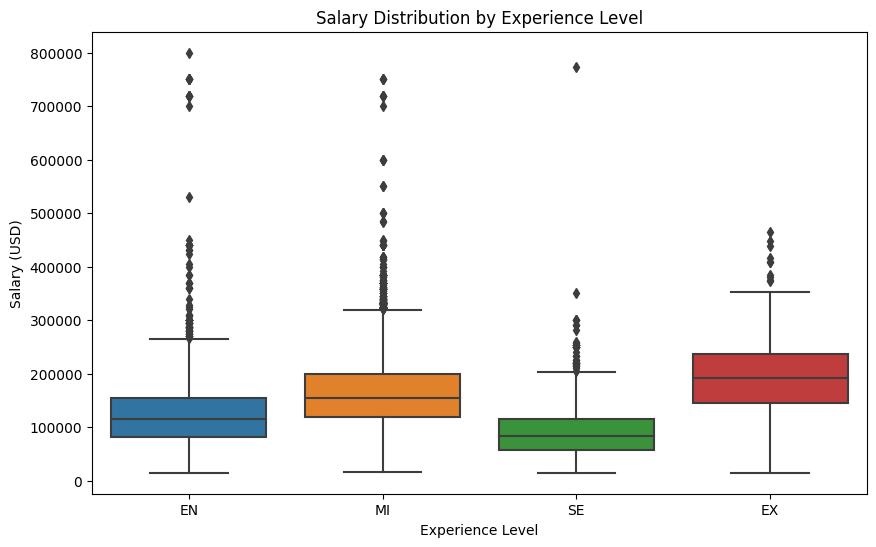

In [14]:
# Calculate median salary for each experience level
experience_salaries = Data_Salary.groupby('experience_level')['salary_in_usd'].median().reset_index()

# Sort experience levels by median salary in descending order
experience_salaries_sorted = experience_salaries.sort_values('salary_in_usd', ascending=False)

# Merged the ranked experience levels with the original data
Data_Salary_Ranked = pd.merge(Data_Salary, experience_salaries_sorted, on='experience_level')
#print(Data_Salary_Ranked.dtypes)

# Created a dictionary to map experience levels to their rank
experience_rank = {'EN': 0, 'MI': 1, 'SE': 2, 'EX': 3}

# Add a new column 'experience_rank' to the Data_Salary DataFrame based on the mapping
Data_Salary['experience_rank'] = Data_Salary['experience_level'].map(experience_rank)

# Display the ranked experience levels
print("Experience Levels Ranked by Median Salary:")
print(experience_salaries_sorted)

plt.figure(figsize=(10, 6))
sns.boxplot(data=Data_Salary, x='experience_level', y='salary_in_usd')
plt.title('Salary Distribution by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary (USD)')
plt.xticks([0, 1, 2, 3], ['EN', 'MI', 'SE', 'EX'])
plt.show()

# Ranking Experience Levels by Median Salary

To begin, we rank the experience levels based on their median salaries. This gives us an initial understanding of how salaries differ across experience levels.

**The output shows that the experience levels are ranked as follows:**

* EX (Executive) with a median salary of $180,000

* SE (Senior) with a median salary of $165,000

* MI (Mid-level) with a median salary of $129,900

* EN (Entry-level) with a median salary of $85,750

# Scatter Plot: Salary vs. Experience Level

To visualize the relationship between salary and experience level, we create a scatter plot.

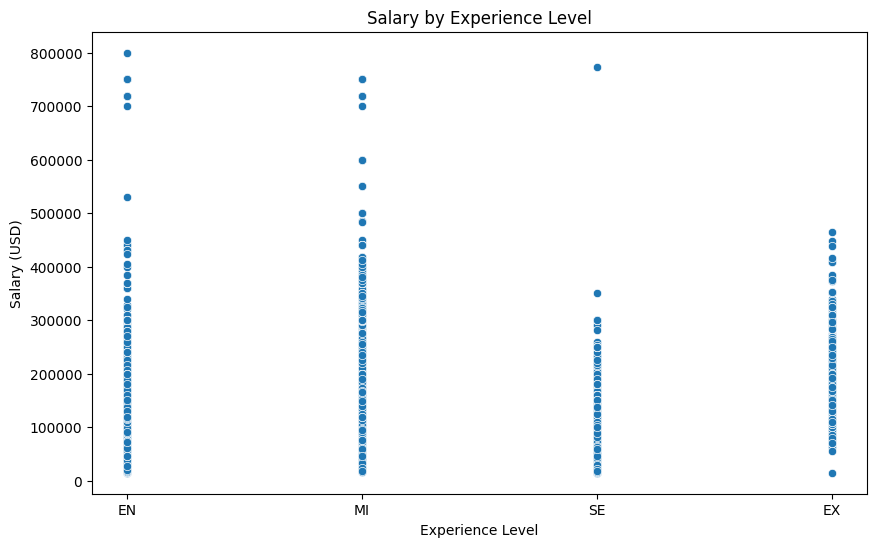

In [15]:
# Merged the ranked experience levels with the original data
Data_Salary_Ranked = pd.merge(Data_Salary, experience_salaries_sorted, on='experience_level')
#print(Data_Salary_Ranked.dtypes)

# Created a dictionary to map experience levels to their rank
experience_rank = {'EN': 0, 'MI': 1, 'SE': 2, 'EX': 3}

# Add a new column 'experience_rank' to the Data_Salary DataFrame based on the mapping
Data_Salary['experience_rank'] = Data_Salary['experience_level'].map(experience_rank)

#Scatter Plot 
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Data_Salary_Ranked, x='experience_level', y='salary_in_usd_x')
plt.title('Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary (USD)')
plt.xticks([0, 1, 2, 3], ['EN', 'MI', 'SE', 'EX'])
plt.show()